In [22]:
import numpy as np
import scipy.stats as stats
z_stat= (11.8-12)/ (1.7/np.sqrt(2000))
z_stat

-5.261336417646546

In [4]:
stats.norm.isf(0.025) #critical value for two tail tests

1.9599639845400545

In [5]:
stats.norm.isf(0.05) # critical value for one tail tests

1.6448536269514729

In [ ]:
#Ha = Average Time < 12min
#H0 = Average Time >= 12 min

In [23]:
stats.norm.cdf(z_stat) # pvalue wrt z distribution

7.150604556278985e-08

In [30]:
stats.t.cdf(z_stat,df=1999) # pvalue wrt tdistribution

7.916372912413357e-08

In [ ]:
#If p value is less than 0.05 (5%), we reject the null hyposthesis H0
#If p value is more than 0.05, we fail to reject the null hypothesis

#Here for this case, p is less than 0.05, Hence we are rejecting the H0 and accepting Ha

In [7]:
from scipy.stats import ttest_1samp

In [24]:
vol=np.random.randn(2000) # this is zscores
samp_vol=vol*1.7 + 11.8

In [16]:
#z=(xi-xbar) / x_std

#xi = z*x_std + xbar

In [26]:
sm=np.mean(samp_vol)
sm

11.791976670375263

In [27]:
sd=np.std(samp_vol)
sd

1.6680678051230982

In [28]:
t,p=ttest_1samp(samp_vol,12)
print(t,p)

-5.575768579698063 2.7988306796234072e-08


In [29]:
pval=p/2  # for one tail one sample ttest
pval

1.3994153398117036e-08

In [31]:
# Example 2:
#H0: Average age of positive cases = 38
#Ha: Average is not equal to 38

In [44]:
vol=np.random.randn(2500) # this is zscores
samp_vol=vol*4.3 + 37.2

In [53]:
sm=samp_vol.mean()
sd=samp_vol.std()
sm,sd

(37.253272295422235, 4.226113873270481)

In [54]:
t,p=ttest_1samp(samp_vol,38)

In [55]:
t,p

(-8.832917977214253, 1.880359041540098e-18)

In [ ]:
pval=p # for two tail test

In [57]:
# manual approach
z_stat = (sm-38)/(sd/np.sqrt(2500))
z_stat

-8.834685090961495

In [59]:
p=stats.norm.cdf(z_stat)
pval=2*p
pval

1.0038062928669117e-18

In [60]:
p=stats.t.cdf(z_stat,df=2499)
pval=2*p
pval

1.851758906598889e-18

In [67]:
# Example 3:
vol=np.random.randn(300) # this is zscores
samp_vol=vol*30 + 185

sm=samp_vol.mean()
sd=samp_vol.std()
sm,sd

(186.5727246849406, 31.643492084776714)

In [70]:
t,p=ttest_1samp(samp_vol,180)
t,p

(3.59167168031698, 0.00038398637729123906)

In [71]:
pval = p/2 # as it is one tail test
pval

0.00019199318864561953

In [72]:
# manual approach
z_stat = (sm-180)/(sd/np.sqrt(300))
z_stat

3.5976728067747286

In [74]:
p=stats.norm.cdf(z_stat)
pval=1-p # as it is right tail test
pval

0.0001605385847041063

In [75]:
# Two Sample ttest

In [76]:
(18.3 - 16.5)/ np.sqrt((2.5**2/1200)+(1.8**2/1000))

19.58334994801522

In [ ]:
# the above score is more than 1.96, hence we can reject the null hypotheis

In [79]:
import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/HR_stat_data.csv')

In [82]:
data.head(2)

,Individual,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age1,MonthlyIncome1
0,Ind1,Yes,41,1,1102,1,1,2,1,1,...,0,8,0,1,6,4,0,5,43.1,8952.576429
1,Ind2,No,49,2,279,2,8,1,1,1,...,1,10,3,3,10,7,1,7,42.4,15078.533314


In [85]:
data['Gender'].value_counts()

1    882
2    588
Name: Gender, dtype: int64

In [83]:
# Whether this company showing any gender bias interms of providing salary ?

# This is two sample test
# Independent test

# Ho: Male salary = Female Salary (No bias)
# Ha: Male Salary != Female Salary

In [84]:
# We need monthlyIncome information for male group
# We need monthlyIncome information for female group

In [90]:
grp1=data[data['Gender']==1]['MonthlyIncome']
grp2=data[data['Gender']==2]['MonthlyIncome']

In [91]:
len(grp1),len(grp2)

(882, 588)

In [92]:
np.mean(grp1),np.mean(grp2)

(6380.507936507936, 6686.566326530612)

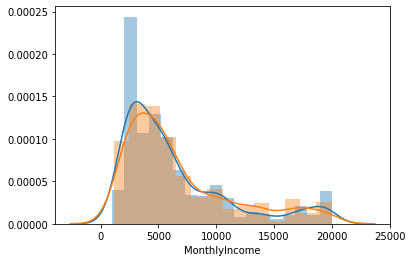

In [93]:
import seaborn as sb
sb.distplot(grp1)
sb.distplot(grp2)

In [94]:
len(data)

1470

In [95]:
# Parametric test - Generally have some assumptions
# For ttest, the assumptions are
  #1. Each group data must be close to normal
  #2. Variance of group must close to each other

In [ ]:
# Shapiro test for checking the Normality of the data
# H0 : Data is normally distributed
# Ha: Data is not normally Distributed

In [103]:
t,p=stats.shapiro(grp1)
if p>0.05:
    print(p,"Data can be normally distributed")
else:
    print(p,"Data is not normal")
    

1.709933327621381e-30 Data is not normal


In [104]:
t,p=stats.shapiro(grp2)
if p>0.05:
    print(p,"Data can be normally distributed")
else:
    print(p,"Data is not normal")

9.378564564919968e-24 Data is not normal


In [105]:
# Levene test is to check the varaince between two groups
# H0: Varaince between two group is same
# Ha: Varaince between the group is not same

t,p=stats.levene(grp1,grp2)
if p>0.05:
    print(p,"Variance can be same")
else:
    print(p,"Variance is not same")

0.7173805016372548 Variance can be same


In [106]:
#H0: Male salary = Female Salary
#H1: Male Salary != Female Salary
stats.ttest_ind(grp1,grp2)

Ttest_indResult(statistic=-1.2212617308870655, pvalue=0.22218303455087898)

As per the above p value, we fail to reject the null hypothesis (Which means both the gender salary can be same).

But this result is not valid/reliable as the normality assumption was failed

##### Conduct the same analysis using the MonthlyIncome1 and tell whetehr ttest can be carried out for making the decision about the hypothesis

In [108]:
grp1=data[data['Gender']==1]['MonthlyIncome1']
grp2=data[data['Gender']==2]['MonthlyIncome1']

In [109]:
t,p=stats.shapiro(grp1)
if p>0.05:
    print(p,"Data can be normally distributed")
else:
    print(p,"Data is not normal")

0.3499474823474884 Data can be normally distributed


In [110]:
t,p=stats.shapiro(grp2)
if p>0.05:
    print(p,"Data can be normally distributed")
else:
    print(p,"Data is not normal")

0.7762246131896973 Data can be normally distributed


In [111]:
t,p=stats.levene(grp1,grp2)
if p>0.05:
    print(p,"Variance can be same")
else:
    print(p,"Variance is not same")

0.19260073262980018 Variance can be same


In [112]:
#H0: Male salary = Female Salary
#H1: Male Salary != Female Salary
stats.ttest_ind(grp1,grp2)

Ttest_indResult(statistic=0.4484606350020932, pvalue=0.6538869730579795)

As p value is greater than 0.05, we failed to reject the H0, Therefore male and female group salary can be same 

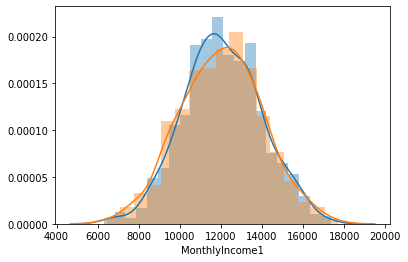

In [113]:
sb.distplot(grp1)
sb.distplot(grp2)

In [114]:
grp1=data[data['Gender']==1]['MonthlyIncome']
grp2=data[data['Gender']==2]['MonthlyIncome']

In [120]:
# Mannwhitenyu Test - Non parametric test for two sample ttest
# H0: Median of group 1 = Median of group 2
# Ha: Median of two groups are not equal

stats.mannwhitneyu(grp1,grp2,alternative='two-sided')

MannwhitneyuResult(statistic=245722.5, pvalue=0.08841668326602119)

In [117]:
grp1.mean(), grp2.mean()

(6380.507936507936, 6686.566326530612)

#### I want to understand the Attrition through MontlyIncome. Apply Statistical technique to understand it

In [121]:
#H0: Salary of the attrition group and non atrrition group is same
#Ha: Salary of the attrition group and non atrrition group is not same

grp1=data[data['Attrition']=='Yes']['MonthlyIncome']
grp2=data[data['Attrition']=='No']['MonthlyIncome']

In [122]:
# Mannwhitenyu Test - Non parametric test for two sample ttest
# H0: Median of group 1 = Median of group 2
# Ha: Median of two groups are not equal

stats.mannwhitneyu(grp1,grp2,alternative='two-sided')

MannwhitneyuResult(statistic=100620.5, pvalue=2.950830917288873e-14)

##### We conclude that there is  a significant differnce exist between the median value of attrition and non attrition group people's salary

In [123]:
# There is a need of PostHOC analysis

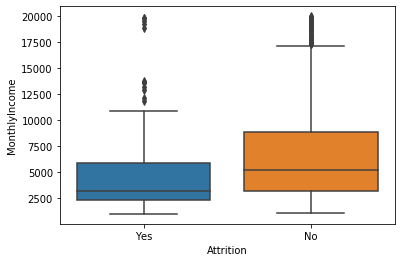

In [124]:
sb.boxplot(data['Attrition'],data['MonthlyIncome'])

In [126]:
data['Department'].value_counts()

2    961
1    446
3     63
Name: Department, dtype: int64